In [76]:
from functools import partial
from geopy.geocoders import Nominatim
from datetime import timedelta, datetime

from sklearn import datasets
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, dendrogram

import random, pandas as pd
import matplotlib.pyplot as plt

In [2]:
geolocator = Nominatim(user_agent="a2")

In [3]:
geocode = partial(geolocator.geocode, language="ru")

In [26]:
df = pd.read_excel('dataset_streets.xlsx')
df = df['Adress'].values.tolist()
out = list()
for elem in df:
    kek = geocode(elem)
    if kek is not None:
        out.append([elem, kek[1][0], kek[1][1]])
out = pd.DataFrame(out, columns=['adress','latitude','longtitude'])
out.to_excel('dataset_streets_final.xlsx',index = False)

In [66]:
weekrandom = [(80,120),(60,90),(55,80),(55,85),(65,100),(45,70),(45,70)]
rapid = [0,0,0,0,0,0,0,0,0,0,0,1,1]
order_type = [0,0,0,1,1,1,2,2,3,3,4]

orders = list()
list_adress = out.values.tolist()
list_adress_from = random.sample(out.values.tolist(),25)
for i,_ in enumerate(list_adress_from):
    list_adress_from[i].append(random.choice(order_type))
startdate = datetime.now() - timedelta(days=90)
for i_date in range(61):
    curdate = startdate + timedelta(days=i_date)
    maxorders = random.randint(weekrandom[datetime.weekday(curdate)][0],weekrandom[datetime.weekday(curdate)][1])
    for i_orders in range(maxorders+1):
        kek = random.choice(list_adress_from)
        while True:
            lol = random.choice(list_adress)
            if kek != lol:
                break
        orders.append([curdate,\
                       kek[0],kek[1],kek[2],\
                       lol[0],lol[1],lol[2],\
                       random.choice(rapid),kek[3],random.randint(300,5000),random.randint(0,1)
                      ])
        if orders[-1][8] == 0:
            orders[-1][7] = 1
orders = pd.DataFrame(orders,columns=['date',\
                                      'adress from','latitude from','longtitude from',\
                                      'adress to','latitude to','longtitude to',\
                                      'rapid','order_type','cost','cashed'
                                     ])
orders.to_excel('dataset_orders_final.xlsx',index = False)

In [25]:
# timedelta(days=1)
# orders = 

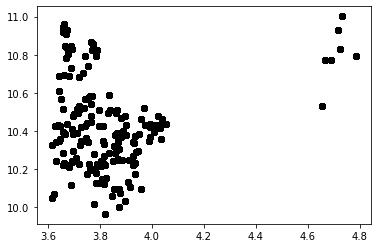

In [109]:
orders = pd.read_excel('dataset_orders_final_new.xlsx')

clust_orders = orders[['latitude to','longtitude to','rapid']].copy()
clust_orders = clust_orders[clust_orders['rapid'] == 0]
clust_orders = clust_orders.drop(['rapid'], axis=1).reset_index()
clust_orders['latitude to'] = (clust_orders['latitude to'] - 55)*10
clust_orders['longtitude to'] = (clust_orders['longtitude to'] - 38)*10

# clust_orders
plt.plot(clust_orders['latitude to'].values, clust_orders['longtitude to'].values, 'o', color='black');

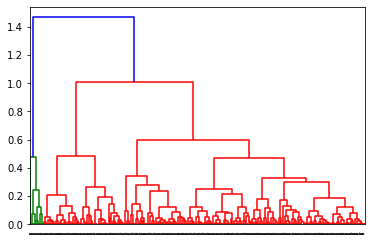

In [104]:

# Извлекаем измерения как массив NumPy
samples = clust_orders.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=1,
           )

plt.show()

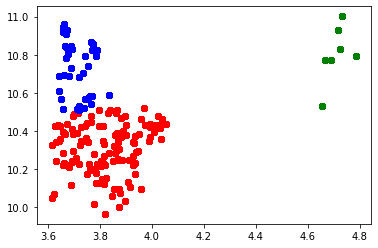

In [111]:
plotlables = ['bo','go','ro','yo']

# Извлекаем измерения как массив NumPy
samples = clust_orders[['latitude to','longtitude to']].values

# Описываем модель
model = KMeans(n_clusters=3)

# Проводим моделирование
model.fit(samples)

# Предсказание на всем наборе данных
all_predictions = model.predict(samples)

all_predictions = pd.DataFrame(all_predictions, columns=['clusters'])
all_predictions['x'] = samples[:,0]
all_predictions['y'] = samples[:,1]
all_predictions['index'] = clust_orders['index']

all_predictions[all_predictions['clusters'] == 1]

for col in all_predictions.clusters.unique():
    plt.plot(all_predictions[all_predictions['clusters'] == col]['x'].values,\
             all_predictions[all_predictions['clusters'] == col]['y'].values,\
             plotlables[int(col)])

In [113]:
output = all_predictions.copy()
output['x'] = output['x']/10+55
output['y'] = output['y']/10+38
output.to_excel('for_peresekator.xlsx',index=False)

In [110]:
clust_orders

,index,latitude to,longtitude to
0,0,3.638781,10.433093
1,2,3.854115,10.320326
2,4,4.008636,10.395189
3,5,3.820610,9.965272
4,7,3.854115,10.320326
...,...,...,...
2940,4541,3.661068,10.233173
2941,4544,3.692505,10.409736
2942,4545,3.808508,10.147379
2943,4546,3.722213,10.325465


In [112]:
all_predictions

,clusters,x,y,index
0,2,3.638781,10.433093,0
1,2,3.854115,10.320326,2
2,2,4.008636,10.395189,4
3,2,3.820610,9.965272,5
4,2,3.854115,10.320326,7
...,...,...,...,...
2940,2,3.661068,10.233173,4541
2941,2,3.692505,10.409736,4544
2942,2,3.808508,10.147379,4545
2943,2,3.722213,10.325465,4546


In [148]:
from sklearn import ensemble as ensemble
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
import math

import numpy as np

/Users/andkaver/opt/anaconda3/envs/tflow/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [149]:
df = pd.read_excel('dataset_predict_orders.xlsx')
df.loc[pd.isna(df['cluster']),['cluster']]=99

In [150]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,weekday,rapid,cluster,Total
weekday,1.000000,0.009409,0.009407,-0.178378
rapid,0.009409,1.000000,0.999859,0.283997
cluster,0.009407,0.999859,1.000000,0.294204
Total,-0.178378,0.283997,0.294204,1.000000


In [151]:
x=df.iloc[:,1:len(df.columns)-1]
y=df.Total
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
(len(y_train),len(y_test))

(188, 47)

In [152]:
%%time
gridParams_RF={'max_depth':[40], # 16 40
              'random_state':[42],
              'n_estimators':[700],# 700 1000
              'min_impurity_decrease':[0],
              'min_samples_split':[2] # 2
           }
model_RF = ensemble.RandomForestRegressor()
grid_RF = GridSearchCV(model_RF, gridParams_RF, cv=5,n_jobs=-1)
grid_RF.fit(x_train, y_train)
print(grid_RF.best_params_)
print(grid_RF.best_score_)

{'max_depth': 40, 'min_impurity_decrease': 0, 'min_samples_split': 2, 'n_estimators': 700, 'random_state': 42}
0.8525230062440222
CPU times: user 682 ms, sys: 10.1 ms, total: 692 ms
Wall time: 1.61 s


In [153]:
%%time
rf=ensemble.RandomForestRegressor(**grid_RF.best_params_, n_jobs=-1)
rf.fit(x_train,y_train)
result_model=rf.predict(x_test)
print(r2_score(y_test, result_model)) 
print(mean_absolute_percentage_error(y_test,result_model))
print(mean_absolute_error(y_test, result_model))
print(explained_variance_score(y_test, result_model)) 

0.887846126061616
30.939239783064913
3.8671980577409344
0.88935008736232
CPU times: user 816 ms, sys: 324 ms, total: 1.14 s
Wall time: 947 ms


In [154]:
result_model_full=rf.predict(x)
print(r2_score(y, result_model_full)) 
print(mean_absolute_percentage_error(y,result_model_full))
print(mean_absolute_error(y, result_model_full))
print(explained_variance_score(y, result_model_full)) 

0.8994983994403536
31.023947407567775
3.4100430664112604
0.8995667239283152


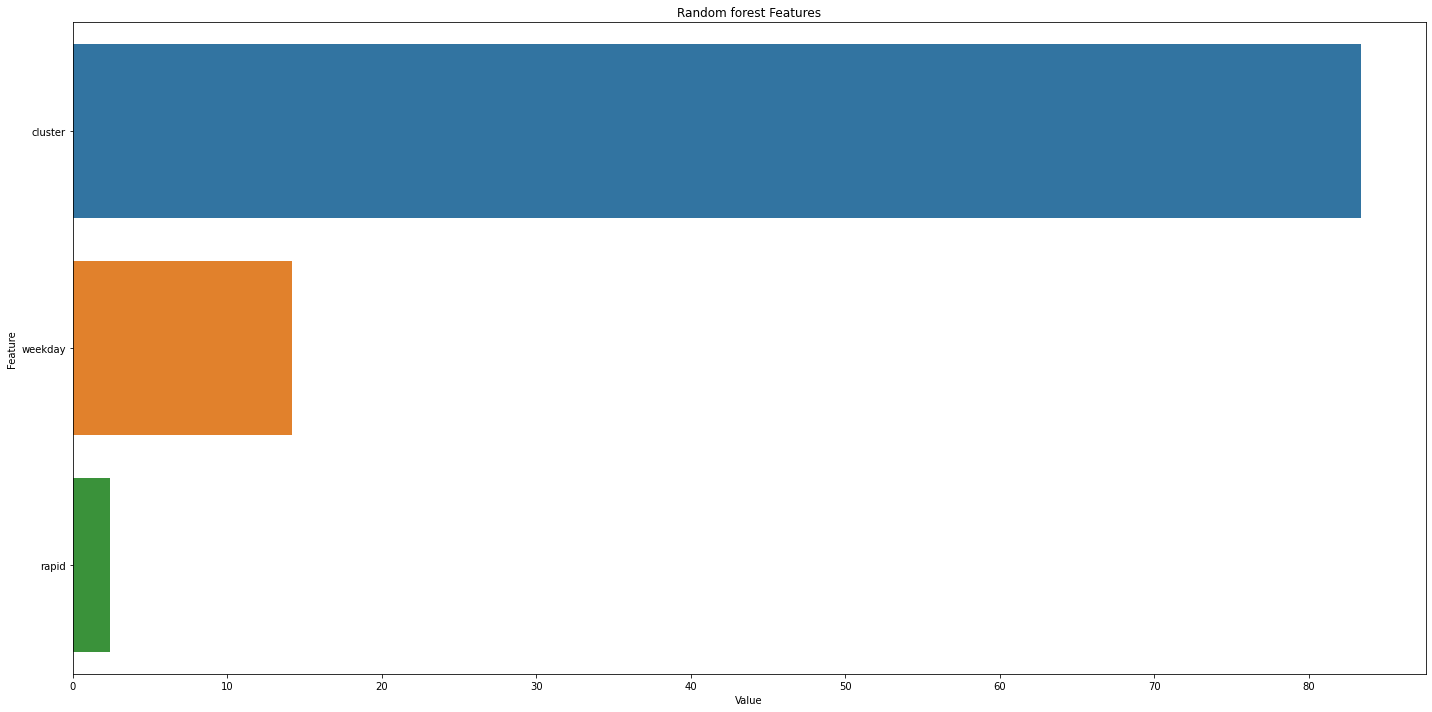

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_*100, x.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Random forest Features')
plt.tight_layout()
plt.show()

In [158]:
joblib.dump(rf, 'prediction_orders.pkl') 
  

['prediction_orders.pkl']

In [159]:
knn_from_joblib = joblib.load('prediction_orders.pkl')  
  
# Use the loaded model to make predictions 
knn_from_joblib.predict(x)

array([ 9.19783396,  1.49666543, 29.18849485, 19.1334025 , 15.55051848,
        2.99318914, 50.56069802, 37.73594408, 13.7885635 ,  2.23067427,
       35.16627402, 26.03605703,  8.11356313,  2.15470685, 29.64592562,
       24.2613436 , 10.82620406,  1.85810693, 29.45222291, 20.67884156,
       11.24223191,  3.31770487, 38.6280856 , 34.31033709,  8.38646578,
       30.79863957, 22.48094453,  9.19783396,  1.49666543, 29.18849485,
       19.1334025 , 15.55051848,  2.99318914, 50.56069802, 37.73594408,
       13.7885635 ,  2.23067427, 35.16627402, 26.03605703,  8.11356313,
        2.15470685, 29.64592562, 24.2613436 , 10.82620406,  1.85810693,
       29.45222291, 20.67884156, 11.24223191,  3.31770487, 38.6280856 ,
       34.31033709,  8.38646578, 30.79863957, 22.48094453,  9.19783396,
        1.49666543, 29.18849485, 19.1334025 , 15.55051848, 50.56069802,
       37.73594408, 13.7885635 ,  2.23067427, 35.16627402, 26.03605703,
        8.11356313,  2.15470685, 29.64592562, 24.2613436 , 10.82